# 10 Species Monkey Image Classification

The uses for image classification are endless.  This project outlines the application of image classification to zoology, specifically for 10 species of Monkeys.  This type of modelling would allow scientists to observe animals in the wild. On a sophisticated level it would allow the ability to identify individual animals. This opens up the possibility of tracking specific groups and individuals without invasive marking or tagging.  

|Label|Common Name|Latin Name|
|---|---|---|
|n0|Mantled Howler|Alouatta Palliata|
|n1|Patas Monkey|Erythrocebus Pata|
|n2|Bald Uakari|Cacajao Calvus|
|n3|Japanese Macaque|Macaca Fusacata|
|n4|Pygmy Marmoset|Cebuella Pygmea|
|n5|White Headed Capuchin|Cebus Capucinus|
|n6|Silvery Marmoset|Mico Argentatus|
|n7|Common Squirrel Monkey|Saimiri Sciureus|
|n8|Black Headed Night Monkey|Aotus Nigriceps|
|n9|Nilgiri Langur|Trachypithecus Johnii|

## The Data

The original data can be found at : https://www.kaggle.com/slothkong/10-monkey-species

This data set contains over 1000 images of 10 different monkey speicies.  It was originally divided into training and testing.  For the purposes of validation I extracted 12 photos of each species from the training file (the largest), and organized them into folders by species.  The corresponding numbers with species is displayed in the table above.  These files are on my local desktop and would need to be extracted from the website to the local server with corresponding paths.

In [1]:
#Necessary Imports
#import os
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Tensor Imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from tensorflow.keras import models, layers, optimizers

#importing confusion matrix/ classification report
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report



### Data Visualization

The purpose of this section was solely to demonstrate that the images are properly fed into Jupyter Notebook with its corresponding label.  This prevents having to add labels into the coding. 

In [2]:
# Create objects to use for directory paths.

n0_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n0'
n1_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n1'
n2_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n2'
n3_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n3'
n4_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n4'
n5_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n5'
n6_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n6'
n7_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n7'
n8_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n8'
n9_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n9'

In [3]:
# Directory with Mantled Howler.
n0_dir = os.path.join(n0_images)

# Directory with Patas Monkey.
n1_dir = os.path.join(n1_images)

# Directory with Bald Uakari.
n2_dir = os.path.join(n2_images)

# Directory with Japanese Macaque.
n3_dir = os.path.join(n3_images)

# Directory with Pygmy Marmoset.
n4_dir = os.path.join(n4_images)

# Directory with White Headed Capuchin.
n5_dir = os.path.join(n5_images)

# Directory with Silvery Marmoset.
n6_dir = os.path.join(n6_images)

# Directory with Common Squirrel Monkey.
n7_dir = os.path.join(n7_images)

# Directory with Black Headed Night Monkey.
n8_dir = os.path.join(n8_images)

# Directory with Nilgiri Langur
n9_dir = os.path.join(n9_images)

In [4]:
#Looking at the amount of images in each class to make sure that the path is working correctly

print('total Mantled Howler images:', len(os.listdir(n0_dir)))
print('total Patas Monkey images:', len(os.listdir(n1_dir)))
print('total Bald Uakari images:', len(os.listdir(n2_dir)))
print('total Japanese Macaque images:', len(os.listdir(n3_dir)))
print('total Pygmy Marmoset images:', len(os.listdir(n4_dir)))
print('total White Headed Capuchin images:', len(os.listdir(n5_dir)))
print('total Silvery Marmoset images:', len(os.listdir(n6_dir)))
print('total Common Squirrl Monkey images:', len(os.listdir(n7_dir)))
print('total Black Headed Night Monkey images:', len(os.listdir(n8_dir)))
print('total Nilgiri Langur images:', len(os.listdir(n9_dir)))

total Mantled Howler images: 94
total Patas Monkey images: 100
total Bald Uakari images: 99
total Japanese Macaque images: 111
total Pygmy Marmoset images: 94
total White Headed Capuchin images: 102
total Silvery Marmoset images: 95
total Common Squirrl Monkey images: 103
total Black Headed Night Monkey images: 95
total Nilgiri Langur images: 95


In [5]:
train_n0 = os.listdir(n0_dir)
print(train_n0[:5])

train_n1 = os.listdir(n1_dir)
print(train_n1[:5])

['n0038.jpg', 'n0164.jpg', 'n0170.jpg', 'n0158.jpg', 'n0159.jpg']
['n1118.jpg', 'n1130.jpg', 'n1124.jpg', 'n1044.jpg', 'n1050.jpg']


In [6]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

Mantled Howler



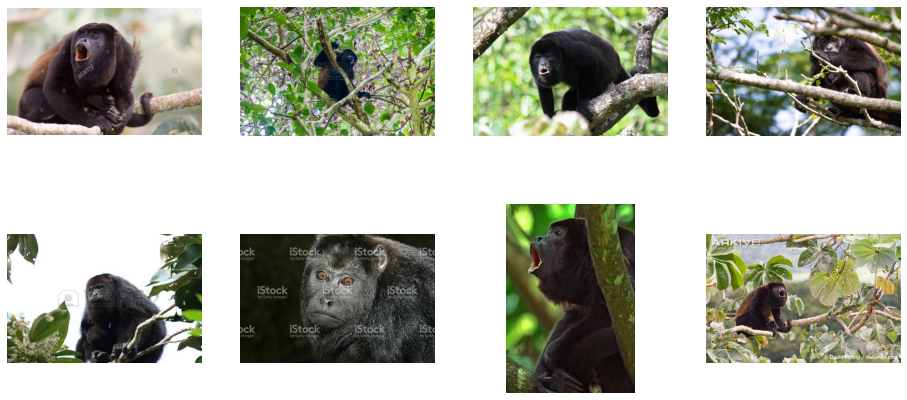

Patas Monkey



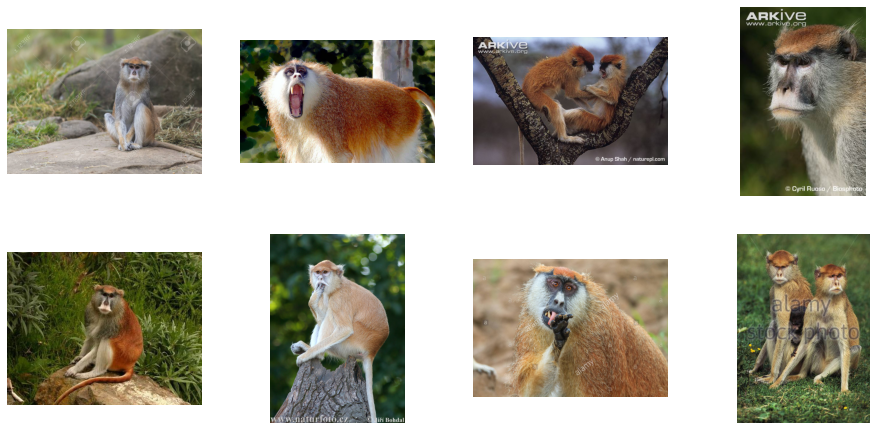

In [7]:
# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_n0_pix = [os.path.join(n0_dir, fname) 
                for fname in train_n0[pic_index-8:pic_index]]
next_n1_pix = [os.path.join(n1_dir, fname) 
                for fname in train_n1[pic_index-8:pic_index]]
print ("Mantled Howler")
print()
for i, img_path in enumerate(next_n0_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

print ("Patas Monkey")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_n1_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

## Building the Models

**MLP v CNN**

Multilayer Perceptrons, or MLPs for short, are the classical type of neural network.
They are comprised of one or more layers of neurons. Data is fed to the input layer, there may be one or more hidden layers providing levels of abstraction, and predictions are made on the output layer, also called the visible layer.


Convolutional Neural Networks, or CNNs, were designed to map image data to an output variable.
They have proven so effective that they are the go-to method for any type of prediction problem involving image data as an input.

### MLP

#### Data Preprocessing

In [8]:
#set as objects
train_path = '/Users/andrewozbun/Desktop/Monkey_Images/training'
test_path = '/Users/andrewozbun/Desktop/Monkey_Images/testing'
validation_path = '/Users/andrewozbun/Desktop/Monkey_Images/validation'

train_batches = ImageDataGenerator(rescale=1. / 255).flow_from_directory(train_path, target_size=(225, 225), 
                                                         classes = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9'],
                                                         batch_size=25)
test_batches = ImageDataGenerator(rescale=1. / 255).flow_from_directory(test_path, target_size=(225, 225), 
                                                         classes = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9'],
                                                         batch_size=25)
validation_batches = ImageDataGenerator(rescale=1. / 255).flow_from_directory(validation_path, target_size=(225, 225), 
                                                         classes = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9'],
                                                         batch_size=25)


Found 978 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Found 120 images belonging to 10 classes.


In [9]:
# Classification MLP(Multilayer perceptron) 
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(350, activation=keras.activations.relu),
    keras.layers.Dense(50, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])


In [10]:
#Model
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x=train_batches,validation_data= validation_batches, epochs=10, verbose=1)
          

Epoch 1/10
40/40 [==============================] - 28s 691ms/step - loss: 29.2555 - accuracy: 0.1380 - val_loss: 15.0522 - val_accuracy: 0.1583
Epoch 2/10
40/40 [==============================] - 27s 682ms/step - loss: 8.0077 - accuracy: 0.2342 - val_loss: 2.3918 - val_accuracy: 0.1750
Epoch 3/10
40/40 [==============================] - 28s 704ms/step - loss: 2.2414 - accuracy: 0.1575 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/10
40/40 [==============================] - 27s 671ms/step - loss: 2.2863 - accuracy: 0.1125 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 5/10
40/40 [==============================] - 25s 634ms/step - loss: 2.2980 - accuracy: 0.1022 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/10
40/40 [==============================] - 25s 616ms/step - loss: 2.3003 - accuracy: 0.0982 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 7/10
40/40 [==============================] - 25s 615ms/step - loss: 2.2976 - accuracy: 0.1033 - val_loss: 2.3030 - val_accuracy: 0.09

### CNN

In [11]:
cnn_model = tf.keras.models.Sequential([
    # The input shape is the desired size of the image 225x 225 with 3 bytes color, RGB.
    #This is also the input "layer", the first convolution is the first hidden layer.
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(225, 225, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #first number is nodes or filters, second number is the kernel size.
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Relu or Rectified linear Unit,
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 10 output neurons for 10 classes with the softmax activation
    tf.keras.layers.Dense(10, activation='softmax')
])


In [12]:
cnn_model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fc5a9f99130>>

In [13]:
cnn_model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn_model.fit(train_batches, validation_data= validation_batches, shuffle = False, epochs=10, batch_size=20, verbose=1)

Epoch 1/10
40/40 [==============================] - 32s 793ms/step - loss: 2.2657 - accuracy: 0.1524 - val_loss: 2.0241 - val_accuracy: 0.3000
Epoch 2/10
40/40 [==============================] - 35s 868ms/step - loss: 1.9467 - accuracy: 0.2914 - val_loss: 1.8436 - val_accuracy: 0.4000
Epoch 3/10
40/40 [==============================] - 32s 794ms/step - loss: 1.5908 - accuracy: 0.4172 - val_loss: 1.6743 - val_accuracy: 0.4917
Epoch 4/10
40/40 [==============================] - 33s 835ms/step - loss: 1.3876 - accuracy: 0.5000 - val_loss: 1.5282 - val_accuracy: 0.5583
Epoch 5/10
40/40 [==============================] - 33s 828ms/step - loss: 1.1999 - accuracy: 0.5654 - val_loss: 1.4435 - val_accuracy: 0.5083
Epoch 6/10
40/40 [==============================] - 37s 918ms/step - loss: 1.1017 - accuracy: 0.5879 - val_loss: 1.6165 - val_accuracy: 0.4500
Epoch 7/10
40/40 [==============================] - 33s 834ms/step - loss: 1.0041 - accuracy: 0.6268 - val_loss: 1.4297 - val_accuracy: 0.5667

In [14]:
cnn_model.evaluate(test_batches)

11/11 [==============================] - 7s 610ms/step - loss: 1.3199 - accuracy: 0.6250


[1.3198776245117188, 0.625]

In [15]:
cnn_model.predict(test_batches)

array([[3.7040923e-07, 3.7682015e-03, 9.8635632e-05, ..., 1.4834877e-04,
        7.6108314e-08, 6.0313705e-06],
       [9.3454772e-01, 1.3739639e-05, 9.2469716e-05, ..., 1.6573571e-04,
        2.7626479e-04, 2.5495680e-02],
       [7.8265505e-10, 9.9753630e-01, 4.3205219e-08, ..., 2.8513026e-07,
        3.9228034e-09, 1.5271053e-07],
       ...,
       [2.9644689e-01, 2.0600148e-04, 7.7405566e-05, ..., 3.7698210e-03,
        2.2958389e-03, 6.0723895e-01],
       [3.4766106e-06, 6.7457438e-01, 9.2294169e-05, ..., 3.1282637e-02,
        4.4345267e-02, 1.5323369e-05],
       [4.1159305e-11, 1.5676512e-04, 5.5469716e-08, ..., 6.5772106e-08,
        5.2600195e-11, 6.6836514e-09]], dtype=float32)

In [16]:
classes = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9']

In [17]:
model_prediction = cnn_model.predict_classes(test_batches)
model_prediction

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 1, 4, 4, 0, 4, 1, 2, 2, 6, 4, 8, 1, 2, 8, 1, 6, 6, 6, 4, 1, 6,
       8, 3, 4, 9, 4, 3, 6, 7, 8, 3, 9, 4, 1, 6, 8, 3, 9, 5, 0, 4, 9, 8,
       6, 6, 1, 8, 4, 4, 4, 2, 0, 3, 3, 7, 5, 5, 3, 0, 1, 1, 1, 2, 3, 4,
       4, 5, 2, 9, 1, 5, 4, 5, 2, 1, 0, 2, 5, 4, 9, 3, 0, 3, 5, 3, 2, 9,
       5, 8, 0, 0, 1, 0, 3, 6, 7, 9, 7, 6, 1, 0, 2, 0, 7, 2, 9, 9, 1, 8,
       0, 9, 4, 9, 7, 4, 1, 1, 5, 8, 6, 4, 2, 1, 2, 8, 8, 8, 1, 6, 7, 1,
       4, 0, 0, 5, 7, 3, 1, 8, 2, 8, 3, 5, 4, 3, 5, 1, 8, 4, 8, 4, 1, 9,
       7, 0, 4, 0, 9, 0, 8, 2, 8, 0, 9, 1, 3, 9, 4, 7, 6, 7, 4, 1, 0, 0,
       1, 1, 3, 9, 9, 4, 8, 1, 3, 1, 4, 0, 5, 1, 0, 5, 5, 6, 1, 4, 2, 3,
       0, 4, 2, 0, 2, 4, 8, 9, 5, 4, 2, 6, 5, 9, 8, 6, 4, 2, 8, 6, 4, 7,
       1, 5, 3, 8, 4, 4, 4, 0, 1, 3, 8, 6, 0, 3, 5, 1, 8, 4, 6, 0, 3, 1,
       1, 0, 1, 2, 0, 4, 9, 5, 0, 7, 2, 3, 8, 2, 3, 0, 9, 4, 4, 3, 0, 3,
       6, 5, 6, 6, 6, 3, 5, 3])

In [18]:
np.array(classes)[model_prediction]

array(['n0', 'n1', 'n4', 'n4', 'n0', 'n4', 'n1', 'n2', 'n2', 'n6', 'n4',
       'n8', 'n1', 'n2', 'n8', 'n1', 'n6', 'n6', 'n6', 'n4', 'n1', 'n6',
       'n8', 'n3', 'n4', 'n9', 'n4', 'n3', 'n6', 'n7', 'n8', 'n3', 'n9',
       'n4', 'n1', 'n6', 'n8', 'n3', 'n9', 'n5', 'n0', 'n4', 'n9', 'n8',
       'n6', 'n6', 'n1', 'n8', 'n4', 'n4', 'n4', 'n2', 'n0', 'n3', 'n3',
       'n7', 'n5', 'n5', 'n3', 'n0', 'n1', 'n1', 'n1', 'n2', 'n3', 'n4',
       'n4', 'n5', 'n2', 'n9', 'n1', 'n5', 'n4', 'n5', 'n2', 'n1', 'n0',
       'n2', 'n5', 'n4', 'n9', 'n3', 'n0', 'n3', 'n5', 'n3', 'n2', 'n9',
       'n5', 'n8', 'n0', 'n0', 'n1', 'n0', 'n3', 'n6', 'n7', 'n9', 'n7',
       'n6', 'n1', 'n0', 'n2', 'n0', 'n7', 'n2', 'n9', 'n9', 'n1', 'n8',
       'n0', 'n9', 'n4', 'n9', 'n7', 'n4', 'n1', 'n1', 'n5', 'n8', 'n6',
       'n4', 'n2', 'n1', 'n2', 'n8', 'n8', 'n8', 'n1', 'n6', 'n7', 'n1',
       'n4', 'n0', 'n0', 'n5', 'n7', 'n3', 'n1', 'n8', 'n2', 'n8', 'n3',
       'n5', 'n4', 'n3', 'n5', 'n1', 'n8', 'n4', 'n

In [19]:
pred = cnn_model.predict(test_batches)

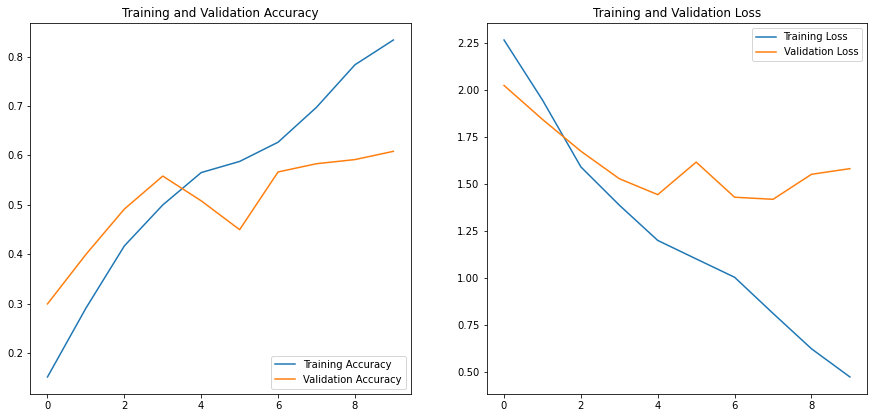

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9], dtype=int32)

In [22]:
predictions = cnn_model.predict(x=test_batches, verbose=0)

In [23]:
np.round(predictions)

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [25]:
print(cm)

[[1 2 3 2 4 2 3 2 4 3]
 [2 3 3 2 2 5 6 3 1 1]
 [4 4 0 5 2 1 6 0 3 2]
 [1 6 3 3 3 6 2 2 1 3]
 [6 2 3 3 4 1 1 1 4 1]
 [2 2 4 3 7 1 0 1 4 4]
 [2 6 3 3 4 1 1 1 3 2]
 [1 4 1 7 3 2 4 2 2 2]
 [7 4 1 1 6 4 0 0 3 1]
 [7 4 2 0 6 0 1 1 2 3]]


In [26]:
def plot_confusion_matrix(cm, classes, 
                         normalize = False,
                         fontsize = 20,
                         cmap=plt.cm.Blues):

    plt.figure(figsize=(30, 30))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.colorbar
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation =45)
    plt.yticks(tick_marks, classes)
    plt.tick_params(axis='both', which='major', labelsize=24)
    
    label_font = {'size':'30'}  
    title_font = {'size':'35'}
    
    thresh = cm.max()/ 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i,j, cm[i,j],
        horizontalalignment='center',
        fontsize=fontsize,
        color='black')

    plt.tight_layout()
    plt.ylabel('True Label',fontdict=label_font)
    plt.xlabel('Predicted Label',fontdict=label_font)
    plt.title('Confusion Matrix',fontdict=title_font)

In [27]:
test_batches.class_indices

{'n0': 0,
 'n1': 1,
 'n2': 2,
 'n3': 3,
 'n4': 4,
 'n5': 5,
 'n6': 6,
 'n7': 7,
 'n8': 8,
 'n9': 9}

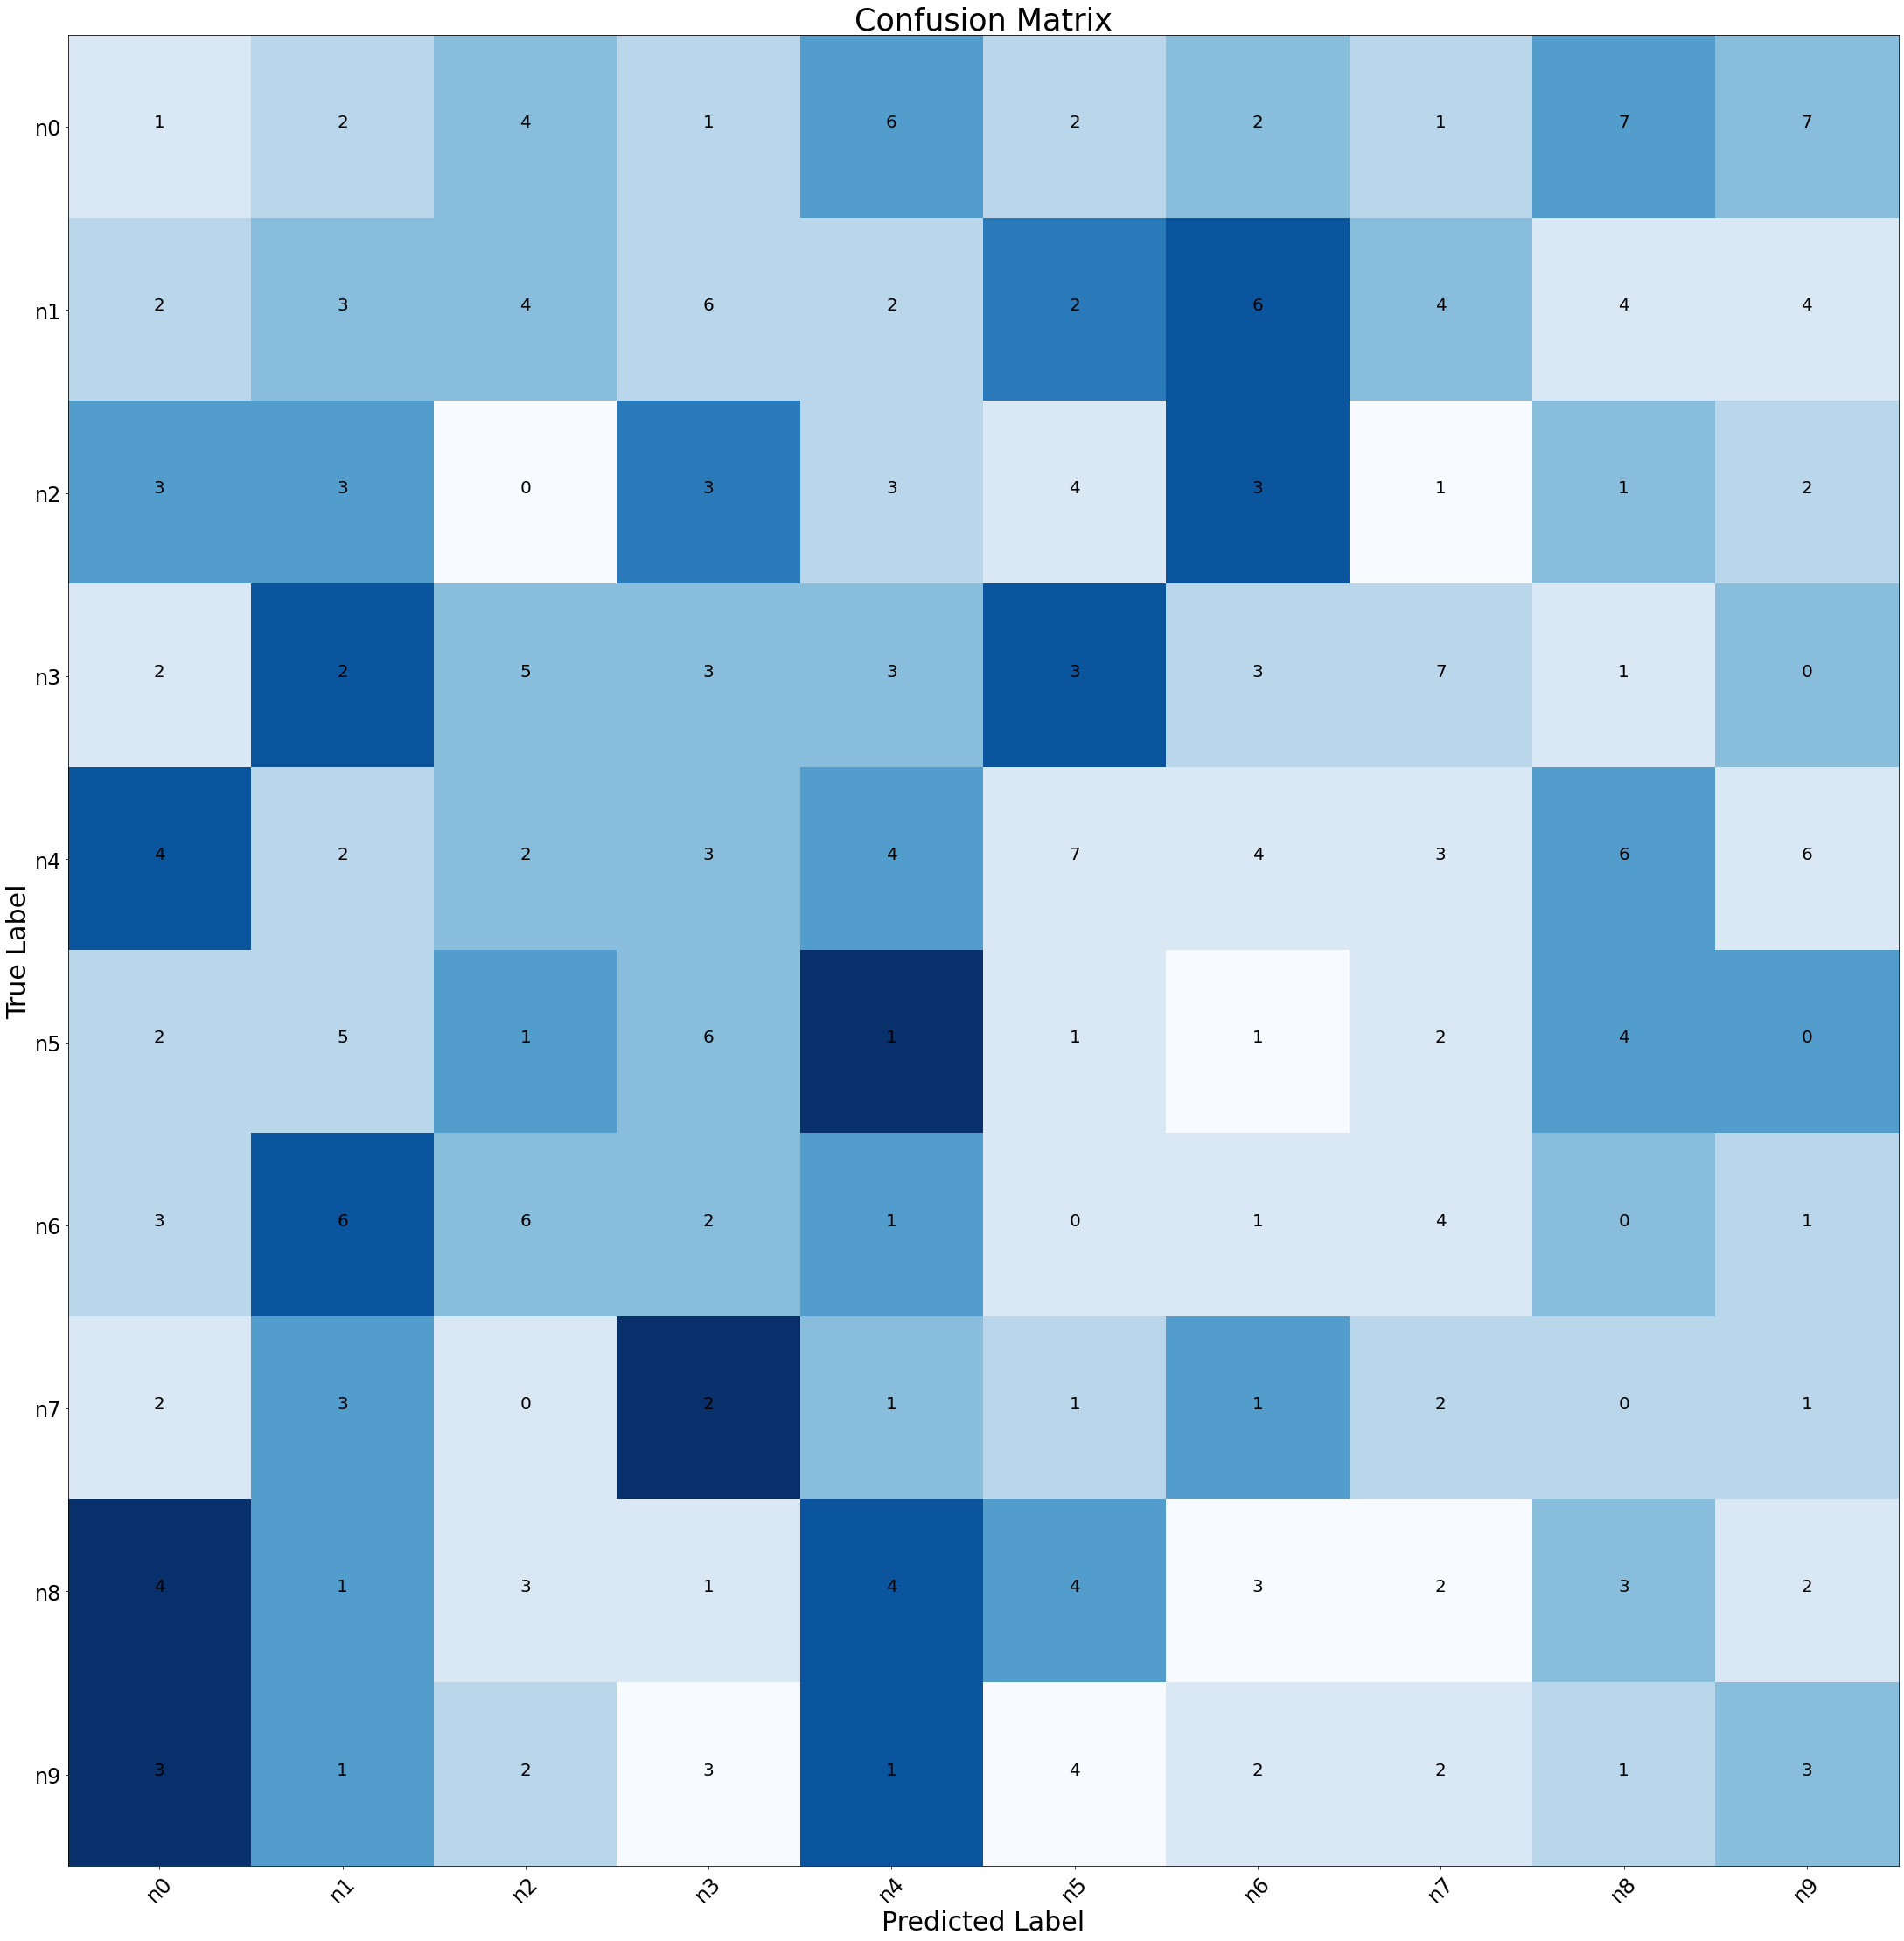

In [33]:
plot_confusion_matrix(cm = cm, classes=classes)

In [66]:
print(classification_report(y_true=train_batches.classes,  y_pred=np.argmax(predictions, axis =-1)))

NotImplementedError: Cannot convert a symbolic Tensor (dense_12/truediv:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

### VGG16 Model

The award winning VGG16 model was developed at Oxford in 2014 by the Visual Geometry Group.  Hence, its name.  The model was trained on 1000 different classes with over 10 million parameters and 95% accuracy.  It has become a sought after model ever since.

#### Transfer Learning

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.  Transfer learning can be used to speed up the learning process and heighten the accuracy.  

In [36]:
vgg_model = VGG16()
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [37]:
type(vgg_model)

tensorflow.python.keras.engine.functional.Functional

In [62]:
model_base = VGG16(include_top=False)

x = model_base.output
predictions = layers.Dense(10, activation='softmax')(x)

Vgg16_model = models.Model(inputs= model_base.input, outputs=predictions)

In [63]:
Vgg16_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [64]:
Vgg16_model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128) 

In [61]:
history_vgg = Vgg16_model.fit(train_batches, 
                              validation_data=validation_batches, 
                              epochs=10, verbose=1,
                              steps_per_epoch=len(train_batches)/32, 
                              validation_steps=len(validation_batches)/32)

Epoch 1/10


InvalidArgumentError:  Incompatible shapes: [25,3,3] vs. [25,10]
	 [[node Equal (defined at <ipython-input-61-2439711264d5>:1) ]] [Op:__inference_train_function_11160]

Function call stack:
train_function
